In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
import pandas as pd

In [2]:
imagesPath = 'trainData'
testPath = 'testData'
valPath = 'valData'
imgSize = 128

In [36]:
trainDatasetOriginal = tf.keras.utils.image_dataset_from_directory(
    directory=f"original/{imagesPath}",
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(imgSize, imgSize),
    shuffle=True,
    seed=17,
    validation_split=0.3,
    subset="training",
    interpolation='bilinear',
)

valDatasetOriginal = tf.keras.utils.image_dataset_from_directory(
    directory=f"original/{imagesPath}",
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(imgSize, imgSize),
    shuffle=True,
    seed=17,
    validation_split=0.3,
    subset="validation",
    interpolation='bilinear',
)

testDatasetOriginal = tf.keras.utils.image_dataset_from_directory(
    directory=f"original/{testPath}",
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(imgSize, imgSize),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
)

Found 23766 files belonging to 4 classes.
Using 16637 files for training.
Found 23766 files belonging to 4 classes.
Using 7129 files for validation.
Found 5853 files belonging to 4 classes.


In [37]:
nnOriginal = Sequential([
    Conv2D(filters=16, kernel_size=(4, 4), activation='relu',
           padding='same', input_shape=(imgSize, imgSize, 3)),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu',
           padding='same'),
    MaxPool2D(pool_size=(2, 2)),
    Flatten(),
    Dense(units=32, activation='relu'),
    Dense(units=4, activation='softmax')
])

nnOriginal.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

tf.keras.utils.plot_model(nnOriginal, show_shapes=True)
nnOriginal.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 128, 16)      784       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 32768)             0         
                                                                 
 dense_4 (Dense)             (None, 32)               

Epoch 1/50
520/520 [==============================] - 18s 32ms/step - loss: 2.1180 - accuracy: 0.5583 - val_loss: 1.0214 - val_accuracy: 0.6106
Epoch 2/50
520/520 [==============================] - 18s 34ms/step - loss: 0.8704 - accuracy: 0.6684 - val_loss: 0.9559 - val_accuracy: 0.6504
Epoch 3/50
520/520 [==============================] - 18s 34ms/step - loss: 0.6806 - accuracy: 0.7454 - val_loss: 0.9986 - val_accuracy: 0.6361
Epoch 4/50
520/520 [==============================] - 18s 35ms/step - loss: 0.5098 - accuracy: 0.8141 - val_loss: 1.1167 - val_accuracy: 0.6587
Epoch 5/50
520/520 [==============================] - 18s 35ms/step - loss: 0.3929 - accuracy: 0.8589 - val_loss: 1.2080 - val_accuracy: 0.6447
Epoch 6/50
520/520 [==============================] - 16s 31ms/step - loss: 0.3074 - accuracy: 0.8920 - val_loss: 1.2716 - val_accuracy: 0.6388
Epoch 7/50
520/520 [==============================] - 16s 31ms/step - loss: 0.2668 - accuracy: 0.9082 - val_loss: 1.5050 - val_accuracy:

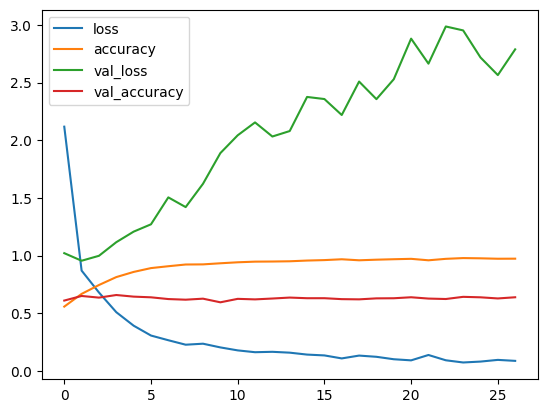

In [38]:
tf.config.get_visible_devices()
historia = nnOriginal.fit(trainDatasetOriginal,
                          epochs=50,
                          validation_data=valDatasetOriginal,
                          callbacks=[
                              tf.keras.callbacks.ModelCheckpoint('model_original_valacc.h5', save_best_only=True,
                                                                 monitor='val_accuracy'),
                              tf.keras.callbacks.ModelCheckpoint('model_original_valloss.h5', save_best_only=True,
                                                                 monitor='val_loss'),
                              tf.keras.callbacks.EarlyStopping(
                                  monitor='accuracy',
                                  patience=3,
                              )]

                          #verbose=0
                          )
nnOriginal.save('model_original.h5')
pd.DataFrame(historia.history).plot()
pd.DataFrame(historia.history).to_csv('historia_original.csv')

<AxesSubplot: >

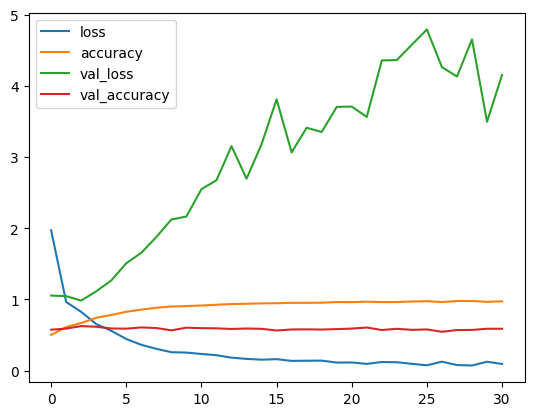

In [5]:
historia = pd.read_csv('historia_original.csv', usecols=['loss', 'accuracy', 'val_loss', 'val_accuracy'])
pd.DataFrame(historia).plot()

In [27]:
nnOriginal.load_weights('model_original.h5')
#nnOriginal.load_weights('model_original_valacc.h5')
#nnOriginal.load_weights('model_original_valloss.h5')

In [42]:
Y_original = np.concatenate([y for x, y in testDatasetOriginal], axis=0)
Y_pred = nnOriginal.predict(testDatasetOriginal)
Y_pred

183/183 [==============================] - 3s 17ms/step


array([[2.2256550e-14, 1.0000000e+00, 9.8509072e-22, 2.1909867e-10],
       [8.6466656e-10, 1.0000000e+00, 3.3539798e-08, 3.0224788e-11],
       [1.9796541e-08, 9.9999809e-01, 4.3836582e-07, 1.4945992e-06],
       ...,
       [1.6427964e-06, 9.9999833e-01, 2.6465786e-17, 3.6712852e-10],
       [3.1757263e-08, 1.0000000e+00, 4.3839947e-08, 1.9648994e-09],
       [2.5885314e-05, 1.4529085e-05, 9.9995947e-01, 7.4346708e-08]],
      dtype=float32)

In [43]:
Y_pred = np.argmax(Y_pred, axis=1)

[Text(0.5, 1.0, 'Predykcja klasy galaktyki dla oryginalnych zdjęć')]

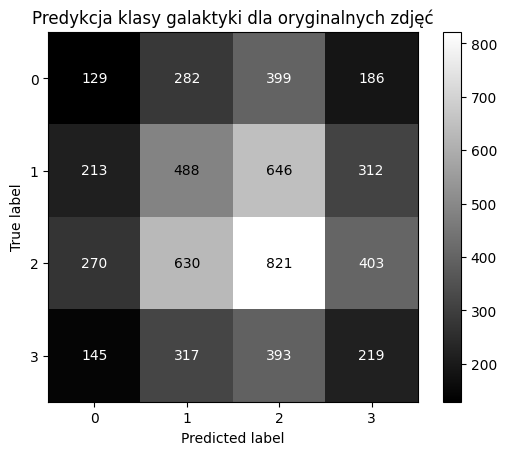

In [44]:
cm = confusion_matrix(Y_original, Y_pred, labels=np.unique(Y_original))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=np.unique(Y_original))
disp.plot(cmap='gray')  # BuPu, bone_r
disp.ax_.set(title='Predykcja klasy galaktyki dla oryginalnych zdjęć')

Histogram

In [18]:
trainDatasetHist = tf.keras.utils.image_dataset_from_directory(
    directory=f"histogram/{imagesPath}",
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(imgSize, imgSize),
    shuffle=True,
    seed=17,
    validation_split=0.3,
    subset="training",
    interpolation='bilinear',
)

valDatasetHist = tf.keras.utils.image_dataset_from_directory(
    directory=f"histogram/{imagesPath}",
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(imgSize, imgSize),
    shuffle=True,
    seed=17,
    validation_split=0.3,
    subset="validation",
    interpolation='bilinear',
)

testDatasetHist = tf.keras.utils.image_dataset_from_directory(
    directory=f"histogram/{testPath}",
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(imgSize, imgSize),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
)


Found 23766 files belonging to 4 classes.
Using 16637 files for training.
Found 23766 files belonging to 4 classes.
Using 7129 files for validation.
Found 5853 files belonging to 4 classes.


In [19]:
nnHist = Sequential([
    Conv2D(filters=16, kernel_size=(4, 4), activation='relu',
           padding='same', input_shape=(imgSize, imgSize, 3)),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu',
           padding='same'),
    MaxPool2D(pool_size=(2, 2)),
    Flatten(),
    Dense(units=32, activation='relu'),
    Dense(units=4, activation='softmax')
])

nnHist.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

#tf.keras.utils.plot_model(nnHist, show_shapes=True)

Epoch 1/50
520/520 [==============================] - 18s 33ms/step - loss: 3.2373 - accuracy: 0.3570 - val_loss: 1.3416 - val_accuracy: 0.3643
Epoch 2/50
520/520 [==============================] - 18s 35ms/step - loss: 1.3366 - accuracy: 0.3690 - val_loss: 1.3561 - val_accuracy: 0.3613
Epoch 3/50
520/520 [==============================] - 18s 34ms/step - loss: 1.3301 - accuracy: 0.3752 - val_loss: 1.3518 - val_accuracy: 0.3567
Epoch 4/50
520/520 [==============================] - 16s 31ms/step - loss: 1.3220 - accuracy: 0.3770 - val_loss: 1.3405 - val_accuracy: 0.3604
Epoch 5/50
520/520 [==============================] - 16s 30ms/step - loss: 1.3048 - accuracy: 0.3939 - val_loss: 1.3528 - val_accuracy: 0.3622
Epoch 6/50
520/520 [==============================] - 17s 33ms/step - loss: 1.2766 - accuracy: 0.4118 - val_loss: 1.3838 - val_accuracy: 0.3591
Epoch 7/50
520/520 [==============================] - 17s 33ms/step - loss: 1.1993 - accuracy: 0.4782 - val_loss: 1.2270 - val_accuracy:

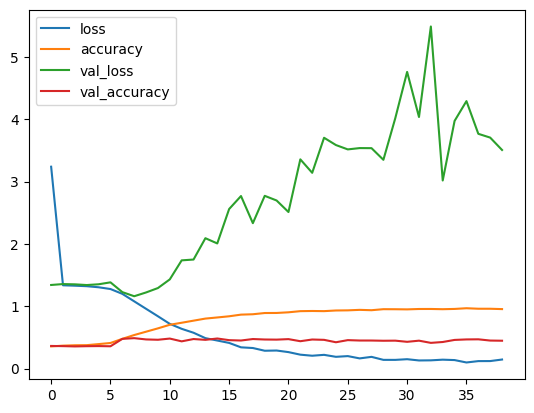

In [20]:
tf.config.get_visible_devices()
historia = nnHist.fit(trainDatasetHist,
                      epochs=50,
                      validation_data=valDatasetHist,
                      callbacks=[
                          tf.keras.callbacks.ModelCheckpoint('model_hist_valacc.h5', save_best_only=True,
                                                             monitor='val_accuracy'),
                          tf.keras.callbacks.ModelCheckpoint('model_hist_valloss.h5', save_best_only=True,
                                                             monitor='val_loss'),
                          tf.keras.callbacks.EarlyStopping(
                              monitor='accuracy',
                              patience=3,
                          )]

                      #verbose=0
                      )
nnHist.save('model_hist.h5')
pd.DataFrame(historia.history).plot()
pd.DataFrame(historia.history).to_csv('historia_hist.csv')

In [ ]:
#nnHist.load_weights('model_hist.h5')
#nnHist.load_weights('model_hist_valacc.h5')
nnHist.load_weights('model_hist_valloss.h5')


In [21]:
Y_original = np.concatenate([y for x, y in testDatasetHist], axis=0)
Y_pred = nnHist.predict(testDatasetHist)
Y_pred = np.argmax(Y_pred, axis=1)

183/183 [==============================] - 4s 19ms/step


[Text(0.5, 1.0, 'Predykcja klasy galaktyki dla zdjęć po wyrównaniu histogramu')]

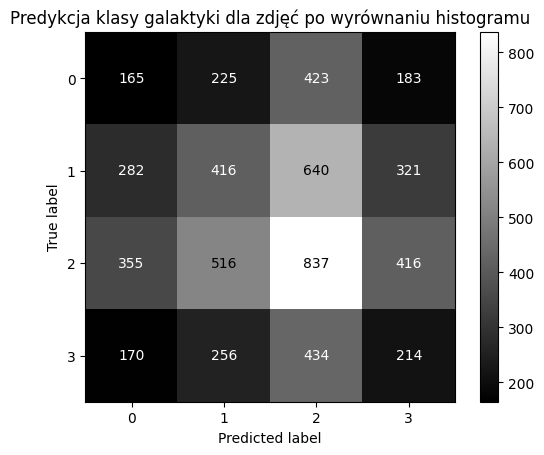

In [22]:
cm = confusion_matrix(Y_original, Y_pred, labels=np.unique(Y_original))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=np.unique(Y_original))
disp.plot(cmap='gray')  # BuPu, bone_r
disp.ax_.set(title='Predykcja klasy galaktyki dla zdjęć po wyrównaniu histogramu')

Filtr medianowy

In [3]:
trainDatasetFilter = tf.keras.utils.image_dataset_from_directory(
    directory=f"filter/{imagesPath}",
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(imgSize, imgSize),
    shuffle=True,
    seed=17,
    validation_split=0.3,
    subset="training",
    interpolation='bilinear',
)

valDatasetFilter = tf.keras.utils.image_dataset_from_directory(
    directory=f"filter/{imagesPath}",
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(imgSize, imgSize),
    shuffle=True,
    seed=17,
    validation_split=0.3,
    subset="validation",
    interpolation='bilinear',
)

testDatasetFilter = tf.keras.utils.image_dataset_from_directory(
    directory=f"filter/{testPath}",
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(imgSize, imgSize),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
)

Found 23766 files belonging to 4 classes.
Using 16637 files for training.
Found 23766 files belonging to 4 classes.
Using 7129 files for validation.
Found 5853 files belonging to 4 classes.


In [4]:
nnFilter = Sequential([
    Conv2D(filters=16, kernel_size=(4, 4), activation='relu',
           padding='same', input_shape=(imgSize, imgSize, 3)),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu',
           padding='same'),
    MaxPool2D(pool_size=(2, 2)),
    Flatten(),
    Dense(units=32, activation='relu'),
    Dense(units=4, activation='softmax')
])

nnFilter.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

#tf.keras.utils.plot_model(nnFilter, show_shapes=True)

Epoch 1/50
520/520 [==============================] - 20s 32ms/step - loss: 2.6770 - accuracy: 0.4934 - val_loss: 1.1113 - val_accuracy: 0.5730
Epoch 2/50
520/520 [==============================] - 16s 30ms/step - loss: 1.0690 - accuracy: 0.5792 - val_loss: 1.0128 - val_accuracy: 0.6060
Epoch 3/50
520/520 [==============================] - 20s 39ms/step - loss: 0.9205 - accuracy: 0.6449 - val_loss: 0.9873 - val_accuracy: 0.6297
Epoch 4/50
520/520 [==============================] - 18s 33ms/step - loss: 0.8643 - accuracy: 0.6667 - val_loss: 0.9651 - val_accuracy: 0.6330
Epoch 5/50
520/520 [==============================] - 17s 32ms/step - loss: 0.7914 - accuracy: 0.6917 - val_loss: 1.0183 - val_accuracy: 0.6164
Epoch 6/50
520/520 [==============================] - 16s 31ms/step - loss: 0.7214 - accuracy: 0.7216 - val_loss: 1.0496 - val_accuracy: 0.6252
Epoch 7/50
520/520 [==============================] - 16s 30ms/step - loss: 0.6376 - accuracy: 0.7546 - val_loss: 1.1477 - val_accuracy:

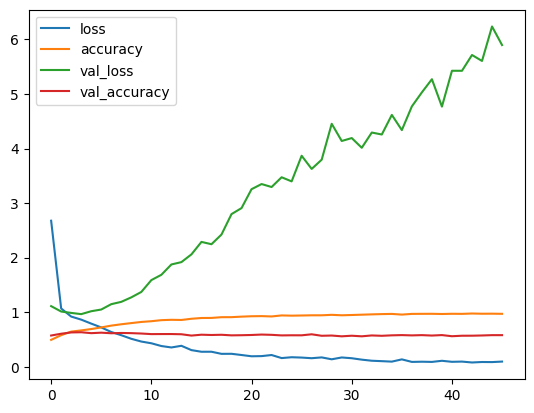

In [5]:
tf.config.get_visible_devices()
historia = nnFilter.fit(trainDatasetFilter,
                        epochs=50,
                        validation_data=valDatasetFilter,
                        callbacks=[
                            tf.keras.callbacks.ModelCheckpoint('model_filter_valacc.h5', save_best_only=True,
                                                               monitor='val_accuracy'),
                            tf.keras.callbacks.ModelCheckpoint('model_filter_valloss.h5', save_best_only=True,
                                                               monitor='val_loss'),
                            tf.keras.callbacks.EarlyStopping(
                                monitor='accuracy',
                                patience=3,
                            )]

                        #verbose=0
                        )
nnFilter.save('model_filter.h5')
pd.DataFrame(historia.history).plot()
pd.DataFrame(historia.history).to_csv('historia_filter.csv')

In [ ]:
#nnFilter.load_weights('model_filter.h5')
#nnFilter.load_weights('model_filter_valacc.h5')
nnFilter.load_weights('model_filter_valloss.h5')

In [8]:
Y_original = np.concatenate([y for x, y in testDatasetFilter], axis=0)
Y_pred = nnFilter.predict(testDatasetFilter)
Y_pred = np.argmax(Y_pred, axis=1)

183/183 [==============================] - 2s 13ms/step


[Text(0.5, 1.0, 'Predykcja klasy galaktyki dla zdjęć po wyrównaniu histogramu')]

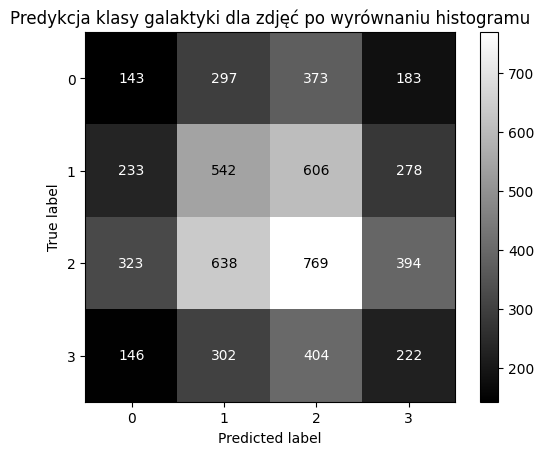

In [9]:
cm = confusion_matrix(Y_original, Y_pred, labels=np.unique(Y_original))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=np.unique(Y_original))
disp.plot(cmap='gray')  # BuPu, bone_r
disp.ax_.set(title='Predykcja klasy galaktyki dla zdjęć po wyrównaniu histogramu')